In [1]:
import numpy as np
import astropy.io.fits as fits
from astropy.table import Table
import ligo.skymap.plot
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import healpy as hp
from matplotlib.colors import TwoSlopeNorm
from astropy.coordinates import SkyCoord
import pickle

import sys, os
sys.path.insert(0, os.path.abspath('/home/tguethle/Documents/spi/Master_Thesis/main_files/'))

print(sys.path)
from datetime import datetime
import astropy.time as at
from pyspi.utils.function_utils import find_response_version
from pyspi.utils.response.spi_response_data import ResponseDataRMF
from pyspi.utils.response.spi_response import ResponseRMFGenerator
from pyspi.utils.response.spi_drm import SPIDRM
from pyspi.utils.livedets import get_live_dets
from MultinestClusterFit import powerlaw_binned_spectrum


['/home/tguethle/Documents/spi/Master_Thesis/main_files', '/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19', '/home/tguethle/.opt/conda/envs/spi39/lib/python39.zip', '/home/tguethle/.opt/conda/envs/spi39/lib/python3.9', '/home/tguethle/.opt/conda/envs/spi39/lib/python3.9/lib-dynload', '', '/home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages']


16:04:32 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=240614;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=5114;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=533488;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=251944;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=123123;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=604640;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

16:04:32 INFO      Starting 3ML!                                                                     ]8;id=30451;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=701623;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#31\31]8;;\

         WARNING   ROOT minimizer not available                                                ]8;id=176676;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=680087;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

16:04:33 WARNING   PyGMO is not available                                                      ]8;id=393670;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=965557;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

16:04:33 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=803098;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=588145;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#79\79]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=431178;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=389593;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#129\129]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=776367;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=741123;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#129\129]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=373200;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=152606;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Using the irfs that are valid between Start and 03/07/06 06:00:00 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 03/07/06 06:00:00 and 04/07/17 08:20:06 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 09/02/19 09:59:57 and 10/05/27 12:45:00 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)


In [2]:
pointing_index = 15

data_path_PE = '/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/data_2_2003_PE/'
data_path_SE = '/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/data_2_2003_center/'
data_path_combined = '/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/data_2_2003_comb/'

def extract_data(data_path):
    with fits.open(f"{data_path}/pointing.fits") as file:
        t = Table.read(file[1])
        
        pointings = np.array(t["PTID_SPI"])
        
        time_start = np.array(t["TSTART"]) + 2451544.5
        time_start = [at.Time(f"{i}", format="jd").datetime for i in time_start]
        time_start = np.array([datetime.strftime(i,'%y%m%d %H%M%S') for i in time_start])
        
    print(pointings[pointing_index])
        
    with fits.open(f"{data_path}/energy_boundaries.fits") as file:
        t = Table.read(file[1])
        energy_bins = np.append(t["E_MIN"], t["E_MAX"][-1])
        
    with fits.open(f"{data_path}/evts_det_spec.fits") as file:
        t = Table.read(file[1])
        counts = t["COUNTS"]
        
    with fits.open(f"{data_path}/dead_time.fits") as file:
        t = Table.read(file[1])
        time_elapsed = np.array(t["LIVETIME"])

    time = time_start[pointing_index]
    dets = get_live_dets(time=time, event_types=["single"])

    print(dets)

    indices = [pointing_index*85 + i for i in dets]
    counts = counts[indices]

    return pointings, time_start, energy_bins, counts, time_elapsed


In [4]:
data_path_high_combined = '/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/data_2017_high_comb/'
HE_2003_path = "/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/data_HE_2003"
PE_2003_path = "/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/data_PE_2003"
data_high_comb = extract_data(data_path_high_combined)
data_HE_2003 = extract_data(HE_2003_path)
data_PE_2003 = extract_data(PE_2003_path)

spiselect_path = "/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/dataset_data_HE_2003/spi"
with fits.open(f"{spiselect_path}/evts_det_spec.fits.gz") as file:
    t = Table.read(file[1])
    spi = np.array(t["COUNTS"])

with fits.open(f"{data_path_high_combined}/evts_det_spec.fits") as file:
    t = Table.read(file[1])
    counts_high_comb = t["COUNTS"]
    print(counts_high_comb[0])


with fits.open(f"{HE_2003_path}/evts_det_spec.fits") as file:
    t = Table.read(file[1])
    counts_HE= t["COUNTS"]

with fits.open(f"{PE_2003_path}/evts_det_spec.fits") as file:
    t = Table.read(file[1])
    counts_PE = t["COUNTS"]


print(f"number of pointings: {len(data_high_comb[0])}")

print(data_high_comb[3].shape)
print(spi.shape)


18560020.000000
[ 0  3  4  6  7  8  9 10 11 12 13 14 15 16 18]
00430027.000000
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
00430027.000000
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[6277 4052 3081 2682 1934 1300  820  609  408  311  395  259]
number of pointings: 226
(15, 12)
(3629, 12)


[2089 1194  889  805  556  344  235  150   92   72   94   85]


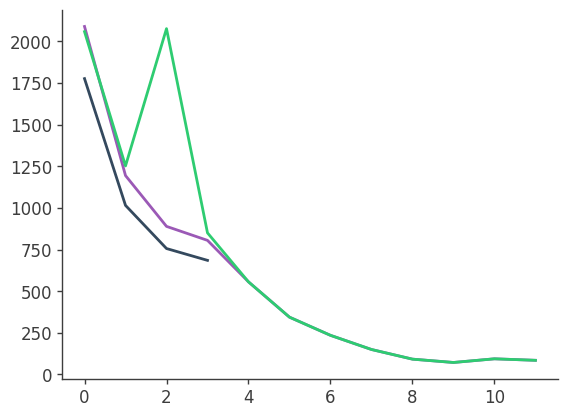

In [4]:
plt.plot(counts_high_comb[0])

plt.plot(counts_HE[0])
plt.plot(counts_PE[0])

print(counts_high_comb[0])

In [15]:

data_PE = extract_data(data_path_PE)
data_SE = extract_data(data_path_SE)
# data_combined = extract_data(data_path_combined)

3629
00430027.000000
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
00430027.000000
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


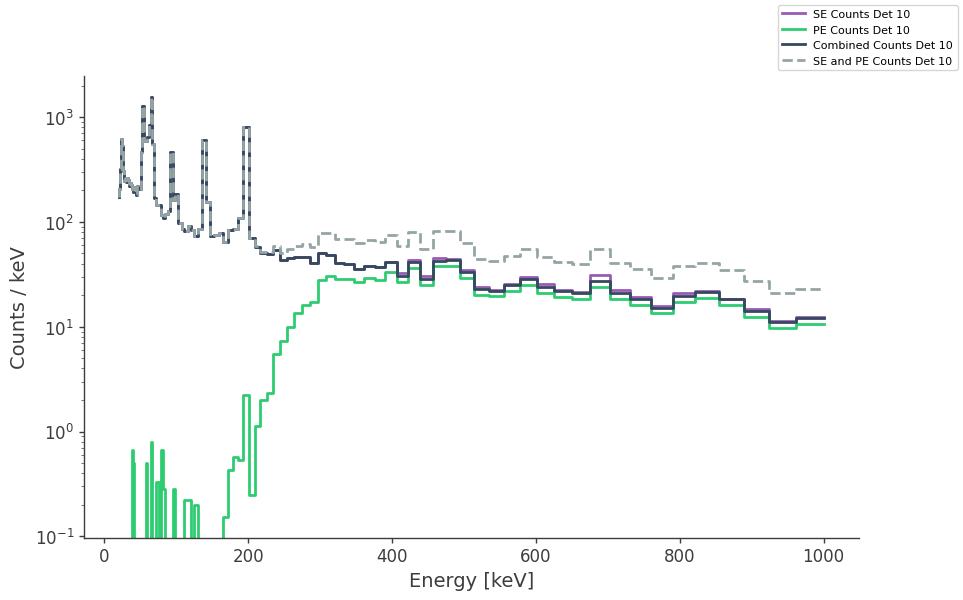

In [33]:
%matplotlib inline

det_index = 10
energy_bins = data_SE[2]
counts = data_SE[3]
bins_width = energy_bins[1:] - energy_bins[:-1]

counts_PE = data_PE[3]
counts_combined = data_combined[3]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.set_ylabel('Counts / keV')
ax.set_xlabel('Energy [keV]')
ax.step(energy_bins[1:], counts[det_index] / bins_width, where='pre', label=f'SE Counts Det {det_index}')
ax.step(energy_bins[1:], counts_PE[det_index] / bins_width, where='pre', label=f'PE Counts Det {det_index}')
ax.step(energy_bins[1:], counts_combined[det_index] / bins_width, where='pre', label=f'Combined Counts Det {det_index}')
ax.step(energy_bins[1:], (counts_PE[det_index] + counts[det_index]) / bins_width, where='pre', label=f'SE and PE Counts Det {det_index}', linestyle='--')
ax.set_yscale('log')

fig.legend()

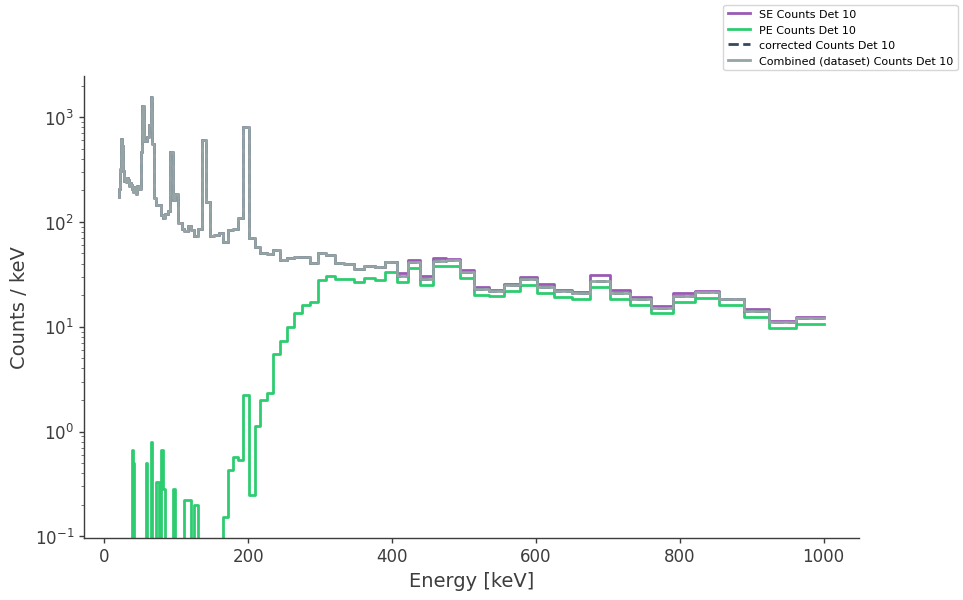

In [35]:

det_index = 10
energy_bins = data_SE[2]
counts = data_SE[3]
bins_width = energy_bins[1:] - energy_bins[:-1]

counts_PE = data_PE[3]
counts_combined = data_combined[3]

corrected_counts = []

psd_eff = 0.88

for i in range(counts.shape[1]):
    if energy_bins[i] < 400:
        corrected_counts.append(counts[det_index,i])
    else:
        corrected_counts.append(counts_PE[det_index,i] / psd_eff)



fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.set_ylabel('Counts / keV')
ax.set_xlabel('Energy [keV]')
ax.step(energy_bins[1:], counts[det_index] / bins_width, where='pre', label=f'SE Counts Det {det_index}')
ax.step(energy_bins[1:], counts_PE[det_index] / bins_width, where='pre', label=f'PE Counts Det {det_index}')
ax.step(energy_bins[1:], corrected_counts / bins_width, where='pre', label=f'corrected Counts Det {det_index}', linestyle='--')
ax.step(energy_bins[1:], counts_combined[det_index] / bins_width, where='pre', label=f'Combined (dataset) Counts Det {det_index}')
ax.set_yscale('log')

fig.legend()